# Alva Lab Test, Sergei Vorobyov

In [1]:
# 2025-03-21
# Mount my Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# All Python imports here
from datetime import datetime
import numpy as np  # needed for pandas
import pandas as pd
import sklearn  # same as scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## A Few Disclaimers:

1. We provide all real and tested SQL queries run in BigQuery. All resulting tables are very small and we can .csv-copy them to Colab

2. The large size of the dataset does not allow to run it directly in the Colab notebook (memory overflow)

3. Connection problems (Access Denied: Dataset alva-coding-test:chicago_crime: Permission bigquery.datasets.get denied on dataset alva-coding-test:chicago_crime) prevented to connect from Colab to BigQuery

4. The sections in this notebook match exactly the 7 Tasks in the assignment.

# Task 1: Oldest crime

In [ ]:
"""
SELECT * FROM `alva-coding-test.chicago_crime.crime` ORDER BY `Date` LIMIT 1000;  -- first row corresponds to oldest crime on 2001-01-01 00:00:00
-- Actually there are 195 simultaneous crimes on that date:
SELECT COUNT(*) FROM `alva-coding-test.chicago_crime.crime` WHERE `Date` = '2001-01-01 00:00:00';
"""

The 195 oldest crimes in the dataset are dated 2001-01-01 00:00:00

# Task 2: which year had the highest amount of crimes

In [ ]:
"""
SELECT EXTRACT(YEAR FROM `Date`) AS crime_year, COUNT(*) AS n_crimes FROM `alva-coding-test.chicago_crime.crime` GROUP BY crime_year ORDER BY n_crimes DESC LIMIT 1;
"""

Year 2002 had 486825 crimes, followed by year 2001 with 485920 crimes

# Task 3: Arrest Rate

In [ ]:
"""
-- Arrest rate by year
SELECT EXTRACT(YEAR FROM `Date`) AS crime_year, COUNT(*) AS n_crimes, COUNT(CASE WHEN `arrest` = TRUE THEN 1 END) AS ARRESTED_COUNT, COUNT(CASE WHEN `arrest` = FALSE THEN 1 END) AS NON_ARRESTED_COUNT, AVG(CAST(arrest AS INT64)) AS ARREST_RATE FROM `alva-coding-test.chicago_crime.crime` GROUP BY crime_year ORDER BY crime_year;
"""

In [ ]:
df3a = pd.read_csv('drive/MyDrive/Colab Notebooks/006 Hector Rail/3a.csv')  # table from BigQuery
df3a

,crime_year,n_crimes,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATE
0,2001,485920,141942,343978,0.292110
1,2002,486825,141578,345247,0.290819
2,2003,475989,141600,334389,0.297486
3,2004,469432,144704,324728,0.308253
4,2005,453779,140928,312851,0.310565
5,2006,448191,135426,312765,0.302161
6,2007,437093,131881,305212,0.301723
7,2008,427196,110026,317170,0.257554
8,2009,392842,110840,282002,0.282149
9,2010,370540,100554,269986,0.271372


# The next plot shows the declining ARREST_RATE trend

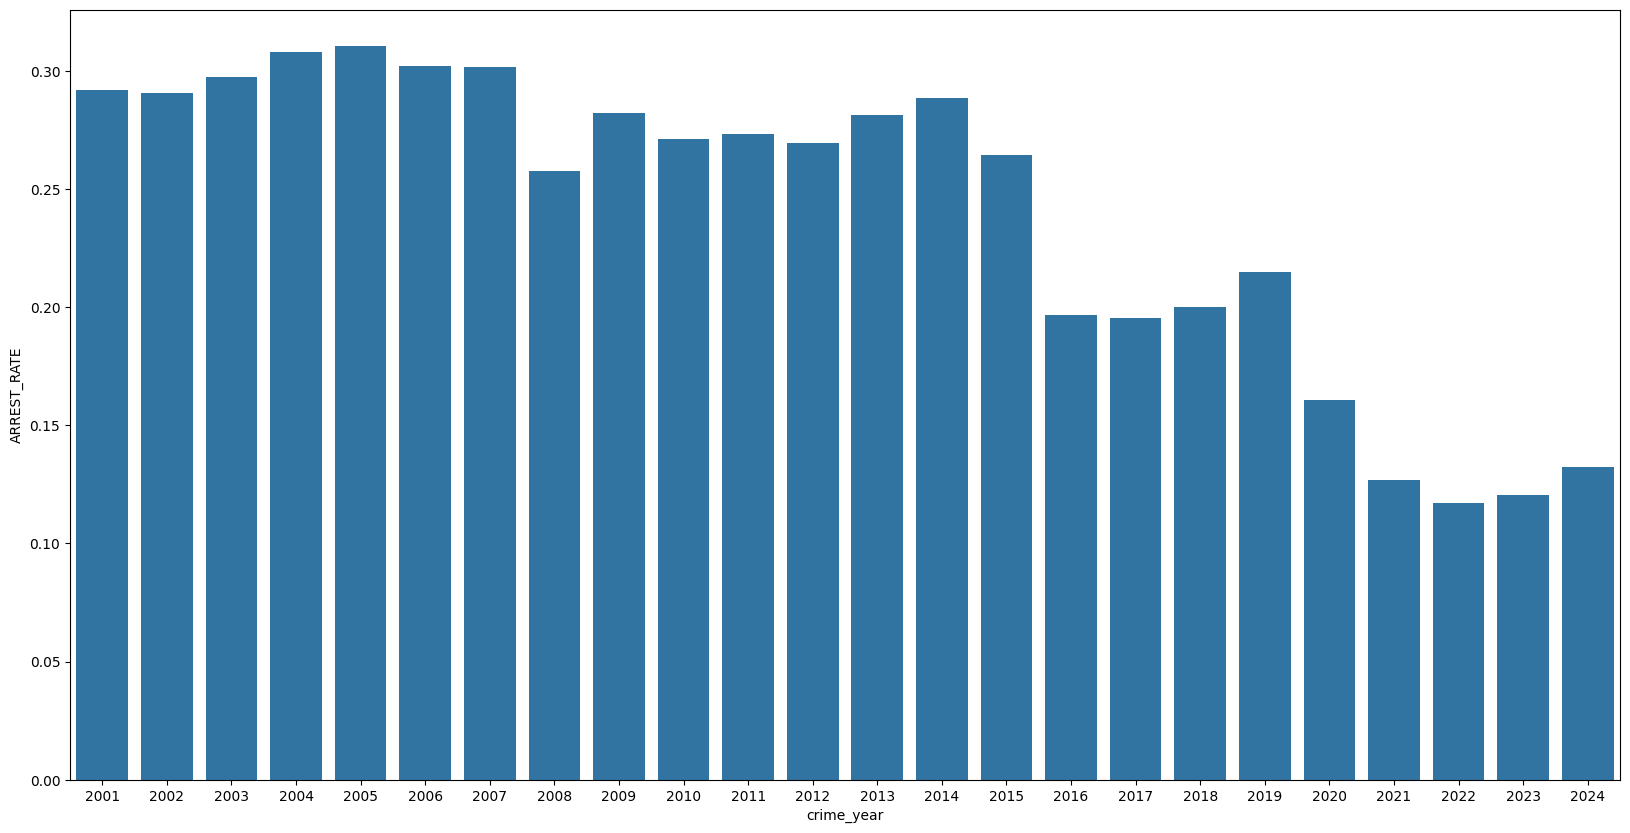

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="crime_year", y="ARREST_RATE", data=df3a);

## Arrest rate, decreasing order

In [ ]:
"""
-- Arrest rates in decreaing order, first line - the highest rate
SELECT EXTRACT(YEAR FROM `Date`) AS crime_year, COUNT(*) AS n_crimes, COUNT(CASE WHEN `arrest` = TRUE THEN 1 END) AS ARRESTED_COUNT, COUNT(CASE WHEN `arrest` = FALSE THEN 1 END) AS NON_ARRESTED_COUNT, AVG(CAST(arrest AS INT64)) AS ARREST_RATE FROM `alva-coding-test.chicago_crime.crime` GROUP BY crime_year ORDER BY ARREST_RATE DESC;
"""

In [ ]:
# Equivalently, sorting the data frame:
df3a.sort_values(by='ARREST_RATE', ascending=False)

,crime_year,n_crimes,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATE
4,2005,453779,140928,312851,0.310565
3,2004,469432,144704,324728,0.308253
5,2006,448191,135426,312765,0.302161
6,2007,437093,131881,305212,0.301723
2,2003,475989,141600,334389,0.297486
0,2001,485920,141942,343978,0.292110
1,2002,486825,141578,345247,0.290819
13,2014,275846,79656,196190,0.288770
8,2009,392842,110840,282002,0.282149
12,2013,307568,86567,221001,0.281456


## The highest arrest rate was in 2005

# Task 4: five most common crimes in 2020

In [ ]:
"""
SELECT `primary_type`, COUNT(*) AS CRIME_COUNT, COUNT(CASE WHEN `arrest` = TRUE THEN 1 END) AS ARRESTED_COUNT, COUNT(CASE WHEN `arrest` = FALSE THEN 1 END) AS NON_ARRESTED_COUNT, AVG(CAST(arrest AS INT64)) AS ARREST_RATE
FROM `alva-coding-test.chicago_crime.crime` WHERE EXTRACT(YEAR FROM `Date`) = 2020 GROUP BY `primary_type` ORDER BY CRIME_COUNT DESC LIMIT 5;
"""

In [ ]:
df4 = pd.read_csv('drive/MyDrive/Colab Notebooks/006 Hector Rail/4.csv')  # table from BigQuery
df4

,primary_type,CRIME_COUNT,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATE
0,BATTERY,41514,6920,34594,0.166691
1,THEFT,41337,2804,38533,0.067833
2,CRIMINAL DAMAGE,24877,1179,23698,0.047393
3,DECEPTIVE PRACTICE,18487,385,18102,0.020825
4,ASSAULT,18257,2331,15926,0.127677


## Arrest rate among those top 5 decreasing

In [ ]:
df4.sort_values(by='ARREST_RATE', ascending=False)

,primary_type,CRIME_COUNT,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATE
0,BATTERY,41514,6920,34594,0.166691
4,ASSAULT,18257,2331,15926,0.127677
1,THEFT,41337,2804,38533,0.067833
2,CRIMINAL DAMAGE,24877,1179,23698,0.047393
3,DECEPTIVE PRACTICE,18487,385,18102,0.020825


# Task 5: Which year had the highest number of crimes leading to an arrest

In [ ]:
"""
SELECT EXTRACT(YEAR FROM `Date`) AS crime_year, COUNT(*) AS n_crimes, COUNT(CASE WHEN `arrest` = TRUE THEN 1 END) AS ARRESTED_COUNT, COUNT(CASE WHEN `arrest` = FALSE THEN 1 END) AS NON_ARRESTED_COUNT, AVG(CAST(arrest AS INT64)) AS ARREST_RATE FROM `alva-coding-test.chicago_crime.crime` GROUP BY crime_year ORDER BY ARREST_RATE DESC;
"""

In [ ]:
df5 = pd.read_csv('drive/MyDrive/Colab Notebooks/006 Hector Rail/5.csv')  # table from BigQuery
df5
# we see that 2005 had the highest arrest rate 0.310565 with 140928 arrests

,crime_year,n_crimes,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATE
0,2005,453779,140928,312851,0.310565
1,2004,469432,144704,324728,0.308253
2,2006,448191,135426,312765,0.302161
3,2007,437093,131881,305212,0.301723
4,2003,475989,141600,334389,0.297486
5,2001,485920,141942,343978,0.292110
6,2002,486825,141578,345247,0.290819
7,2014,275846,79656,196190,0.288770
8,2009,392842,110840,282002,0.282149
9,2013,307568,86567,221001,0.281456


# Task 6: Arrest rate

In [ ]:
"""
-- Biggest changes in arrest rate, look at first and last lines
WITH
  SUMMARY2 AS(
    SELECT EXTRACT(YEAR FROM `Date`) AS crime_year, COUNT(*) AS n_crimes, COUNT(CASE WHEN `arrest` = TRUE THEN 1 END) AS ARRESTED_COUNT, COUNT(CASE WHEN `arrest` = FALSE THEN 1 END) AS NON_ARRESTED_COUNT, AVG(CAST(arrest AS INT64)) AS ARREST_RATE FROM `alva-coding-test.chicago_crime.crime` GROUP BY crime_year ORDER BY crime_year
  )
SELECT *, (ARREST_RATE - LAG(ARREST_RATE, 1, NULL) OVER (ORDER BY crime_year)) / LAG(ARREST_RATE, 1, NULL) OVER (ORDER BY crime_year) AS DIFF_PERCENT FROM SUMMARY2 ORDER BY DIFF_PERCENT DESC;
"""

In [ ]:
df6 = pd.read_csv('drive/MyDrive/Colab Notebooks/006 Hector Rail/6.csv')  # table from BigQuery
df6

,crime_year,n_crimes,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATIO
0,2001,485920,141942,343978,0.292110
1,2002,486825,141578,345247,0.290819
2,2003,475989,141600,334389,0.297486
3,2004,469432,144704,324728,0.308253
4,2005,453779,140928,312851,0.310565
5,2006,448191,135426,312765,0.302161
6,2007,437093,131881,305212,0.301723
7,2008,427196,110026,317170,0.257554
8,2009,392842,110840,282002,0.282149
9,2010,370540,100554,269986,0.271372


## This is how the arrest rate looks over time

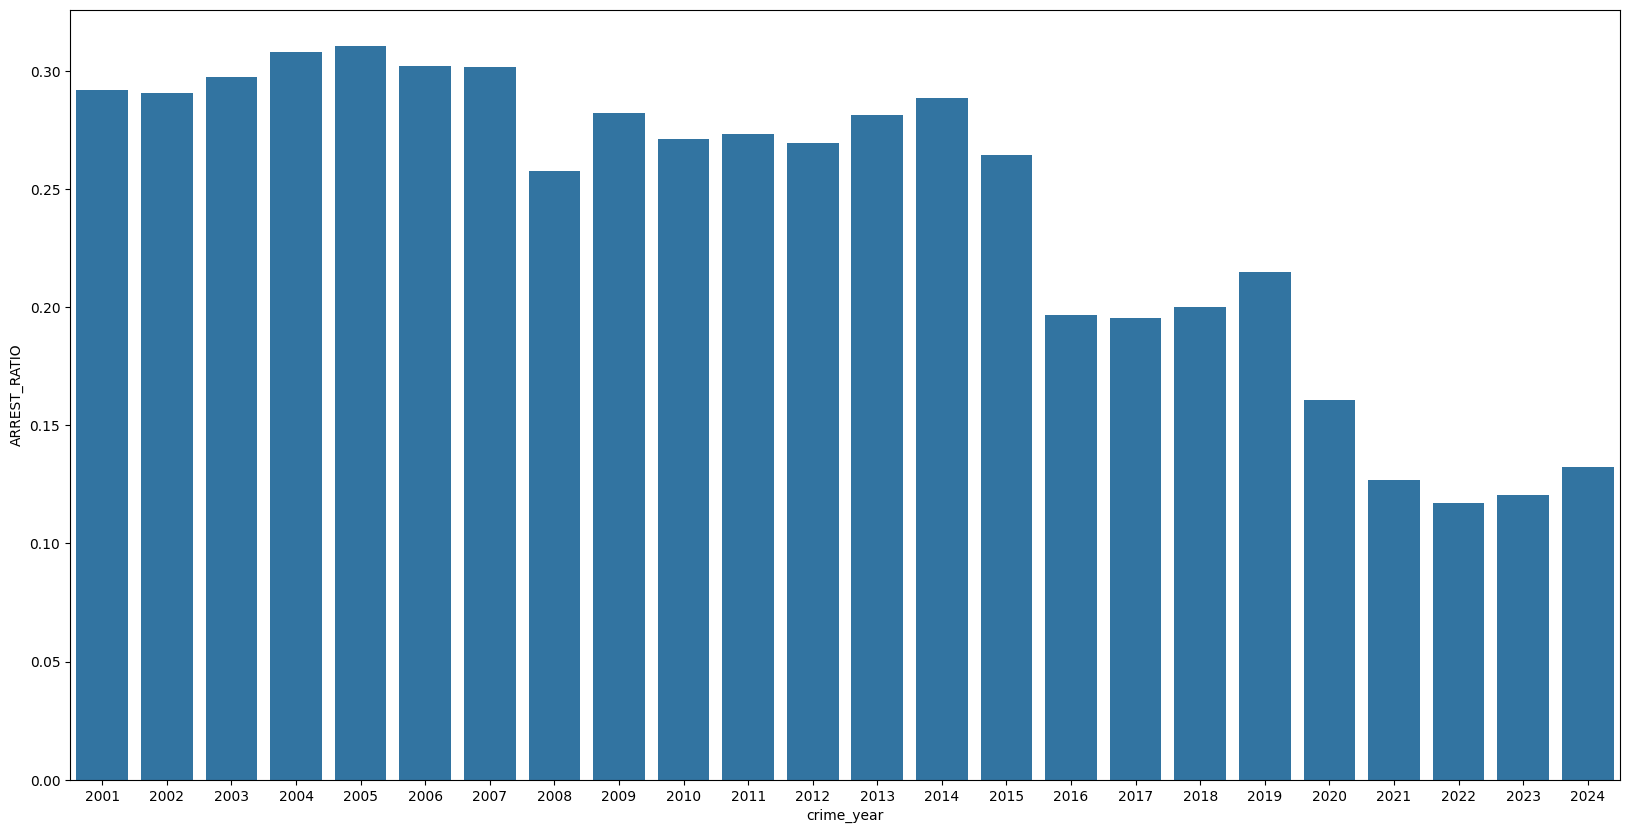

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="crime_year", y="ARREST_RATIO", data=df6);

## Last column contains +/- increase in arrest rate wrt the previous year

### The largest increase is in line 0 year 2024, the largest decrease is in

### line 22 year 2016, line 23 corresponds to year 2001 and we know nothing

### about year 2000, hence NaN

In [ ]:
df6a = pd.read_csv('drive/MyDrive/Colab Notebooks/006 Hector Rail/6a.csv')  # table from BigQuery
df6a

,crime_year,n_crimes,ARRESTED_COUNT,NON_ARRESTED_COUNT,ARREST_RATE,DIFF_PERCENT
0,2024,155673,20609,135064,0.132386,0.097172
1,2009,392842,110840,282002,0.282149,0.095495
2,2019,261494,56251,205243,0.215114,0.073873
3,2013,307568,86567,221001,0.281456,0.043957
4,2004,469432,144704,324728,0.308253,0.036195
5,2023,262395,31661,230734,0.120662,0.030641
6,2014,275846,79656,196190,0.288770,0.025984
7,2018,269035,53892,215143,0.200316,0.023853
8,2003,475989,141600,334389,0.297486,0.022924
9,2011,352016,96299,255717,0.273564,0.008080


## We clearly see positive increases and negative decreases in crime rate

## The biggest drops in year 2016 and 2020

Because of pandemic, many educational institutions and public areas were partially or fully
closed in many jurisdictions, and many events were cancelled or
postponed during 2020 and 2021.

Interstingly, homicides increased dramatically in Chicago in 2016. In 2015, 480 Chicago residents were killed. The next year, 754 were killed—274 additional homicide victims, tragically producing an extraordinary 58% increase in a single year. But homicide is only a small fraction of all crimes, however one of the most important. Possibly, the police turned all attention to homicides thus all other crimes were left neglected and consequently overall arrest rate dropped.


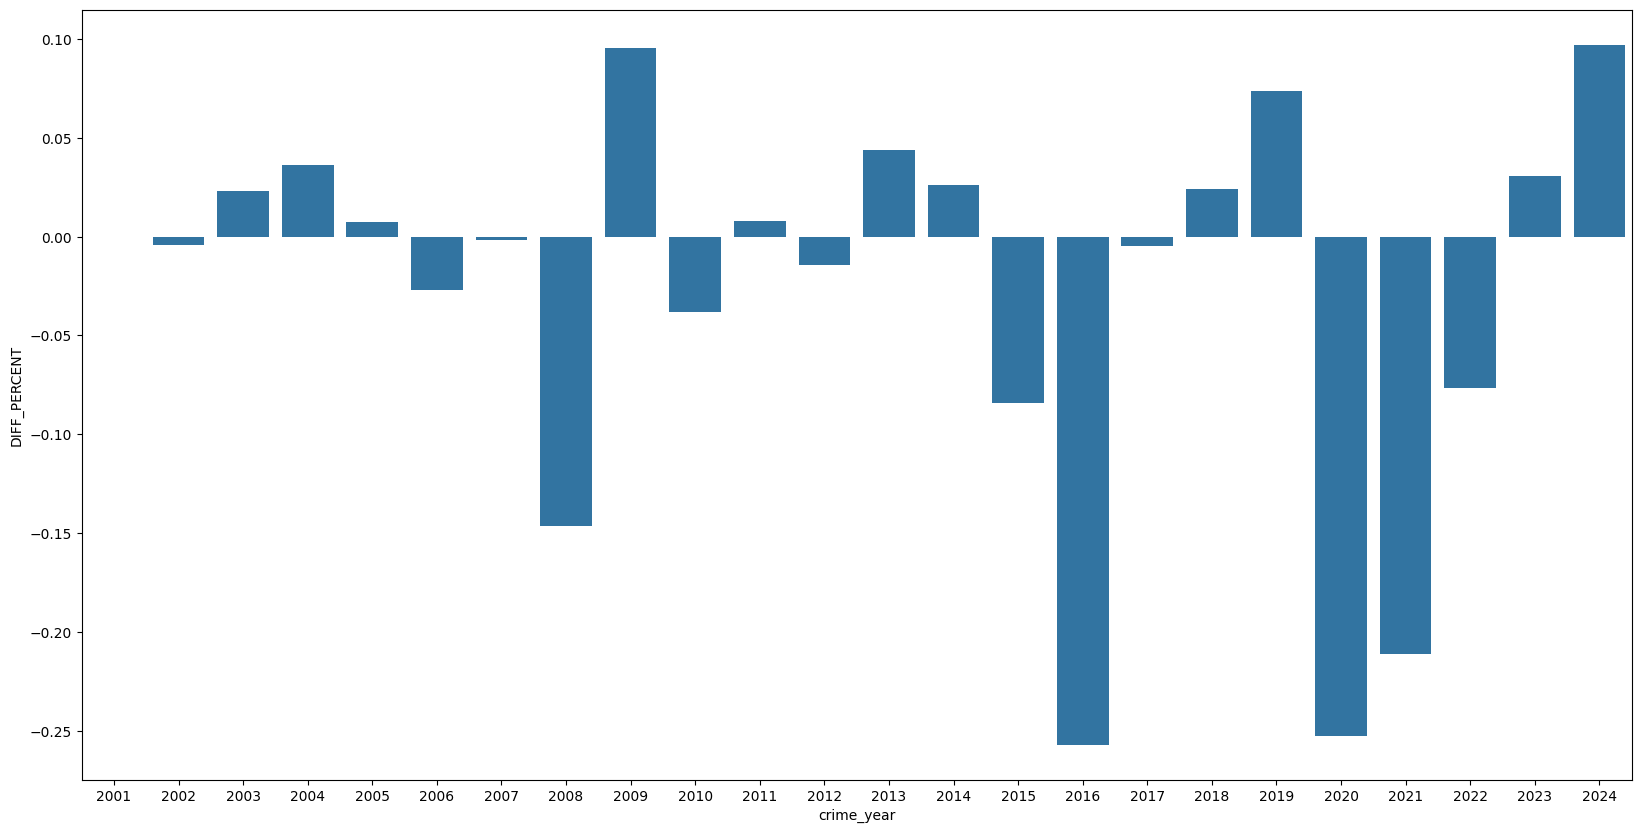

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="crime_year", y="DIFF_PERCENT", data=df6a.sort_values('crime_year'));

# Task 7

The following query selects data for years 2017 and 2018 concerning...

In [ ]:
"""
WITH
  SUMMARY4 AS (
    SELECT
      EXTRACT(YEAR FROM `Date`) AS crime_year,
      AVG(CAST(arrest AS INT64)) AS ARREST_RATE_OVERALL,
      AVG(CASE WHEN `arrest` = TRUE AND `primary_type` = 'THEFT' THEN 1 ELSE 0 END) AS ARREST_RATE_THEFT,
    FROM `alva-coding-test.chicago_crime.crime`
    WHERE (EXTRACT(YEAR FROM `Date`) BETWEEN 2016 AND 2018)
    GROUP BY crime_year
    ORDER BY crime_year
  )
SELECT
  *,
  (ARREST_RATE_OVERALL - LAG(ARREST_RATE_OVERALL, 1, NULL) OVER (ORDER BY crime_year)) / LAG(ARREST_RATE_OVERALL, 1, NULL) OVER (ORDER BY crime_year) AS DIFF_ARREST_RATE_OVERALL,
  (ARREST_RATE_THEFT - LAG(ARREST_RATE_THEFT, 1, NULL) OVER (ORDER BY crime_year)) / LAG(ARREST_RATE_THEFT, 1, NULL) OVER (ORDER BY crime_year) AS DIFF_ARREST_RATE_THEFT,
  FROM SUMMARY4
  ORDER BY crime_year;
"""

This query results in the following dataframe (from a table saved as .csv)

In [14]:
df7e = pd.read_csv('drive/MyDrive/Colab Notebooks/006 Hector Rail/7e.csv')  # table from BigQuery
df7e

,crime_year,ARREST_RATE_OVERALL,ARREST_RATE_THEFT,DIFF_ARREST_RATE_OVERALL,DIFF_ARREST_RATE_THEFT
0,2016,0.196539,0.024164,NaN,NaN
1,2017,0.195649,0.024050,-0.004527,-0.004686
2,2018,0.200316,0.023562,0.023853,-0.020303


The last dataframe shows that ARREST_RATE_THEFT decreased in both 2017 by and 2018 (wrt a previous year), but ARREST_RATE_OVERALL decreased in 2017 and increased in 2018

In [22]:
# Run the t-test:
t_statistic, p_value = stats.ttest_ind(df7e['DIFF_ARREST_RATE_OVERALL'].iloc[1:], df7e['DIFF_ARREST_RATE_THEFT'].iloc[1:])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.3680406263808815
p-value: 0.30472375549456165


## Conclusions

- The null hypothesis: there is no difference in arrest rate change for thefts  and all crimes altogether in the years 2017 and 2018.

- The relatively high p-value of 0.3... (much larger than the typical significance level of 0.05) shows that we fail to reject the null hypothesis.

-  It's very likely that the observed difference is just due to random chance, and not a real effect.